### Importing Libraries

In [13]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### EDA

In [5]:
data = pd.read_csv('learningSet.csv')
data.head(10)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [6]:
# Make a copy
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [7]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,51589.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412

In [8]:
df.shape

(95412, 481)

In [9]:
#Standardize the columns
standard_columns = [df.columns[i].lower() for i in range(len(df.columns))]
df.columns = standard_columns

In [10]:
# Check how correlated the variables are with the response variable
df.corr()['target_d'].sort_values(ascending=False)

target_d    1.000000
target_b    0.774232
ramnt_4     0.268811
ramnt_21    0.099339
ramnt_9     0.090168
              ...   
rdate_3    -0.125194
rdate_5    -0.220455
ramnt_5    -0.272147
adate_5          NaN
adate_15         NaN
Name: target_d, Length: 407, dtype: float64

Seeing that there is no reasonable amount of highly correlated features with the target variable and also considering the size of the dataset, linear regression will most likely not be the right approach to use here.

In [11]:
# Check those that didn't donate at all during this period
len(df[df['target_d'] == 0])

90569

In [12]:
# Check those that gave
len(df[(df['target_d'] > 10) & (df['target_d'] < 50)]) , len(df[df['target_d'] >= 50])

(2656, 114)

From the above numbers which describe function function also confirms, we see that there is remarkable imbalance in the data between the large donors and the low/no donors.

Also, from the information we got from the data write-up, we are more interested in those that had donated and not that didn't donate.

### Data Preprocessing/Cleaning

#### Deal with NaNs

In [13]:
# Because of the number of columns of dataset, we can check the percentage of nulls in the features and take a decision
nulls = pd.DataFrame(df.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(25)

,percentage
rdate_5,99.990567
ramnt_5,99.990567
rdate_3,99.746363
ramnt_3,99.746363
rdate_4,99.705488
ramnt_4,99.705488
ramnt_6,99.186685
rdate_6,99.186685
ramnt_15,92.388798
rdate_15,92.388798


Although we see that there are many numeric features with high percentage of null values, it's mostly better to keep data than to drop them being that they might be highly correlated with the response variable. 
And since null values mostly represent 0 for numeric columns except date columns, we can fill those nulls with zero 

In [14]:
# For instance one of such columns with high percentage of null values is "ramnt_5"
df['ramnt_5'].unique()

array([nan, 50., 12.,  8., 31., 10.,  5., 13.,  4., 20.])

In [15]:
# Fill the nans with 0 for all columns with "ramnt"
[df[col].fillna(0) for col in df.columns if 'ramnt' in col]

[0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 95407    0.0
 95408    0.0
 95409    0.0
 95410    0.0
 95411    0.0
 Name: ramnt_3, Length: 95412, dtype: float64, 0         0.0
 1         0.0
 2         0.0
 3         0.0
 4         0.0
          ... 
 95407     0.0
 95408     0.0
 95409     0.0
 95410    15.0
 95411     0.0
 Name: ramnt_4, Length: 95412, dtype: float64, 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 95407    0.0
 95408    0.0
 95409    0.0
 95410    0.0
 95411    0.0
 Name: ramnt_5, Length: 95412, dtype: float64, 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 95407    0.0
 95408    0.0
 95409    0.0
 95410    0.0
 95411    0.0
 Name: ramnt_6, Length: 95412, dtype: float64, 0         0.0
 1         0.0
 2         0.0
 3         0.0
 4         0.0
          ... 
 95407    25.0
 95408    20.0
 95409     0.0
 95410     0.0
 95411     0.0
 Name: ramnt_7, Length: 

In [16]:
# Check if this increased correlation with the response variable
df.corr()['target_d'].sort_values(ascending=False)

target_d    1.000000
target_b    0.774232
ramnt_4     0.268811
ramnt_21    0.099339
ramnt_9     0.090168
              ...   
rdate_3    -0.125194
rdate_5    -0.220455
ramnt_5    -0.272147
adate_5          NaN
adate_15         NaN
Name: target_d, Length: 407, dtype: float64

No visible significant increase in correlation with response variable

Consequent upon limited time for the analysis, we can remove features with higher percentage of null values

In [17]:
columns_to_keep = list(nulls[nulls['percentage'] < 10].index)
columns_to_keep

['odatedw',
 'osource',
 'tcode',
 'state',
 'zip',
 'mailcode',
 'pvastate',
 'dob',
 'noexch',
 'recinhse',
 'recp3',
 'recpgvg',
 'recsweep',
 'mdmaud',
 'domain',
 'cluster',
 'ageflag',
 'homeownr',
 'child03',
 'child07',
 'child12',
 'child18',
 'gender',
 'hit',
 'datasrce',
 'malemili',
 'malevet',
 'vietvets',
 'wwiivets',
 'localgov',
 'stategov',
 'fedgov',
 'solp3',
 'solih',
 'major',
 'geocode',
 'collect1',
 'veterans',
 'bible',
 'catlg',
 'homee',
 'pets',
 'cdplay',
 'stereo',
 'pcowners',
 'photo',
 'crafts',
 'fisher',
 'gardenin',
 'boats',
 'walker',
 'kidstuff',
 'cards',
 'plates',
 'lifesrc',
 'pepstrfl',
 'pop901',
 'pop902',
 'pop903',
 'pop90c1',
 'pop90c2',
 'pop90c3',
 'pop90c4',
 'pop90c5',
 'eth1',
 'eth2',
 'eth3',
 'eth4',
 'eth5',
 'eth6',
 'eth7',
 'eth8',
 'eth9',
 'eth10',
 'eth11',
 'eth12',
 'eth13',
 'eth14',
 'eth15',
 'eth16',
 'age901',
 'age902',
 'age903',
 'age904',
 'age905',
 'age906',
 'age907',
 'chil1',
 'chil2',
 'chil3',
 'agec1',


Because we don't want to lose the rows of higher donors, we can deal with the nulls from ADATE columns by dropping them, but leaving only "maxadate", which give us the information of the last promotion responded by the donor:

In [18]:
nulls_in_high_donors = df[df['target_d'] > 20][columns_to_keep].isna().sum()
nulls_in_high_donors[nulls_in_high_donors > 0]

adate_3      41
adate_4      40
adate_6      39
adate_7      98
adate_8      47
adate_12    115
dtype: int64

In [19]:
# Filter out "adate_" features that have less than 10% null values
adate_cols_to_drop = [col for col in df.columns if 'adate_' in col and col in columns_to_keep]
adate_cols_to_drop

['adate_2', 'adate_3', 'adate_4', 'adate_6', 'adate_7', 'adate_8', 'adate_12']

In [20]:
# Delete all the adate_ columns with null values from the dataframe(features) we want to keep
[columns_to_keep.remove(col) for col in adate_cols_to_drop]

columns_to_keep = list(set(columns_to_keep))
sorted(columns_to_keep)

['ac1',
 'ac2',
 'adi',
 'afc1',
 'afc2',
 'afc3',
 'afc4',
 'afc5',
 'afc6',
 'age901',
 'age902',
 'age903',
 'age904',
 'age905',
 'age906',
 'age907',
 'agec1',
 'agec2',
 'agec3',
 'agec4',
 'agec5',
 'agec6',
 'agec7',
 'ageflag',
 'anc1',
 'anc10',
 'anc11',
 'anc12',
 'anc13',
 'anc14',
 'anc15',
 'anc2',
 'anc3',
 'anc4',
 'anc5',
 'anc6',
 'anc7',
 'anc8',
 'anc9',
 'avggift',
 'bible',
 'boats',
 'cardgift',
 'cardpm12',
 'cardprom',
 'cards',
 'catlg',
 'cdplay',
 'chil1',
 'chil2',
 'chil3',
 'chilc1',
 'chilc2',
 'chilc3',
 'chilc4',
 'chilc5',
 'child03',
 'child07',
 'child12',
 'child18',
 'cluster',
 'cluster2',
 'collect1',
 'controln',
 'crafts',
 'datasrce',
 'dma',
 'dob',
 'domain',
 'dw1',
 'dw2',
 'dw3',
 'dw4',
 'dw5',
 'dw6',
 'dw7',
 'dw8',
 'dw9',
 'ec1',
 'ec2',
 'ec3',
 'ec4',
 'ec5',
 'ec6',
 'ec7',
 'ec8',
 'eic1',
 'eic10',
 'eic11',
 'eic12',
 'eic13',
 'eic14',
 'eic15',
 'eic16',
 'eic2',
 'eic3',
 'eic4',
 'eic5',
 'eic6',
 'eic7',
 'eic8',
 'eic9'

In [21]:
df_with_no_nulls = df[columns_to_keep].dropna()
df_with_no_nulls

,mc1,ic9,hhas1,chil3,bible,rfa_2a,eic14,rfa_6,ac1,eth2,agec3,vc3,wwiivets,eth16,walker,pobc2,occ12,hu4,sec5,pop90c2,pop90c5,target_b,photo,lfc9,gardenin,ic1,hu2,domain,agec6,stategov,malevet,hvp3,tpe5,rfa_10,rfa_18,eth13,occ6,rhp2,hhd8,ic12,minramnt,child07,hhage2,hvp6,eic11,hv1,lsc1,hc7,veterans,lifesrc,child18,pets,hhd1,cluster2,ec3,tpe9,hvp1,homee,afc1,anc15,hc18,agec7,lfc4,tpe2,chilc1,rfa_3,hhas4,occ8,hc1,agec2,lfc3,ic18,fisher,ac2,marr2,hhd3,rfa_23,zip,plates,hhd2,rfa_4,catlg,ic7,hc21,mdmaud_r,age901,marr3,tpe4,marr4,hhage3,ethc6,ic2,eic10,anc4,anc11,mailcode,hhd9,lfc7,hhd10,fedgov,age903,recsweep,ethc1,anc10,mc2,hc14,maxadate,ic15,hupa6,mc3,pop902,rhp3,eth9,mhuc2,tpe3,chilc5,cardpm12,hvp4,anc3,minrdate,ic3,collect1,hupa7,ic14,age904,tpe12,lfc5,eth14,rfa_5,mhuc1,ec6,lfc6,rfa_2r,datasrce,hhn5,state,kidstuff,eth8,rfa_16,dw4,hhp1,rfa_12,homeownr,hc16,eic7,ic23,tpe6,ic6,eth11,pepstrfl,hvp2,odatedw,anc1,chil1,eth1,lsc3,occ2,rfa_13,hvp5,age906,localgov,hupa5,afc4,hc5,numprom,dw7,solp3,hhn3,pcowners,anc5,hhd4,hhd6,rfa_8,dw8,age902,agec1,hc15,occ9,ethc4,occ10,hu3,pvastate,eic4,rfa_7,afc5,eic13,ethc5,rfa_2,hhd11,occ1,tpe1,oedc7,oedc4,eic12,rfa_15,controln,hc12,pop90c3,rfa_19,occ5,anc13,agec4,eth3,ic10,ic20,mdmaud,tpe13,age905,oedc2,hur2,noexch,sec3,ec5,hhd5,hv2,ic19,mdmaud_f,hupa4,hhd12,lfc10,rp1,dw5,hc19,eic3,sec4,hu5,hu1,ic8,chilc3,hit,occ7,hc11,eic1,hc17,eth5,ec8,hc6,target_d,ec2,hhn1,vc2,pec2,eic6,lfc2,oedc1,hc9,hhas2,occ11,oedc6,anc12,rfa_21,ramntall,hc4,cardgift,gender,voc2,adi,dw6,pop90c4,voc3,sec1,ic13,ec1,hhn2,recp3,afc2,afc3,eic8,voc1,rp3,pop90c1,hc2,tpe8,eth7,rfa_20,lfc1,boats,crafts,lsc4,vc1,ngiftall,anc6,ec7,hhd7,pop903,child12,eic16,avggift,dob,solih,hc10,anc9,recinhse,hv3,hv4,eth10,hur1,lsc2,ethc3,eic9,major,geocode2,ageflag,rhp4,vc4,tpe11,hc8,ic17,ec4,chilc4,rfa_17,lfc8,eth15,dma,ic21,rfa_9,anc8,pop901,anc7,hc20,tpe10,lastdate,rhp1,malemili,hhas3,rfa_2f,eth4,fistdate,child03,msa,rfa_11,pec1,chil2,hhn4,anc2,rfa_22,numprm12,ic4,ic11,eic2,maxramnt,recpgvg,ethc2,hc13,cardprom,agec5,occ3,eic15,maxrdate,cluster,pobc1,age907,rp2,hupa1,eic5,dw2,rfa_24,eth6,ic5,hphone_d,mdmaud_a,geocode,cdplay,cards,rp4,tpe7,occ4,lastgift,tcode,oedc3,hhn6,osource,chilc2,hupa2,vietvets,dw1,eth12,dw9,stereo,ic22,dw3,afc6,oedc5,hhage1,hhp2,sec2,marr1,occ13,hc3,anc14,rfa_14,ic16,hupa3
0,46,23,28,27,,E,4,S4E,10,1,18,18,18,0,,74,5,4,4,35,53,0,,0,,307,14,T2,11,2,39,13,0,S4E,S4E,11,0,61,2,0,5.0,,10,0,0,479,88,54,,,,,38,39.0,10,4,2,,0,0,65,15,64,8,12,S4E,1,9,13,14,50,26,,7,7,70,S4E,61081,,80,S4E,,23,99,X,39,12,0,19,23,0,318,5,23,0,,5,53,9,1,51,,17,0,54,0,9702,4,0,3,264,15,0,2,0,18,6,27,0,9208,349,,0,1,40,2,44,0,S4E,6,8,62,L,,12,IL,,0,S4E,2,198,S4E,,0,7,2,0,13,0,X,7,8901,1,31,92,0,3,S4E,47,54,10,1,18,14,74,7,,49,,0,32,16,S4E,7,48,11,0,3,0,15,96,,41,S4E,39,9,0,L4E,15,9,88,0,7,4,S4E,95515,0,65,S4E,9,0,17,0,15,2,XXXX,45,50,2,61,0,3,21,84,635,17,X,14,3,0,2,0,40,3,19,7,86,23,34,0,3,90,3,33,11,3,31,0.0,16,18,23,13,0,64,10,0,4,19,2,0,S4E,240.0,14,14,F,77,177.0,0,47,19,5,0,120,33,,0,0,13,96,17,0,31,0,0,S4E,56,,,4,34,31,0,4,6,332,,3,7.741935,3712,,0,0,,3,2,0,1,8,25,6,,C,,4,16,16,46,24,39,25,S4E,99,0,682.0,0,S4E,1,992,5,99,14,9512,58,0,51,4,0,8911,,0.0,S4E,1,42,28,4,S4E,14,378,1,0,12.0,,50,10,27,13,8,1,9402,36,3,25,5,2,1,95,S4E,0,12883,0,X,,,,73,0,13,10.0,0,1,4,GRI,11,0,34,97,0,0,,0,2,0,78,26,276,20,61,4,5,2,S4E,25,0
1,56,5,6,21,,G,7,A2G,6,0,33,11,11,4,,39,0,3,10,0,50,0,,99,,1088,4,S1,4,2,15,98,0,A1E,,2,2,73,1,13,10.0,,1,94,3,5468,50,99,,,M,,59,1.0,5,6,97,,0,0,0,2,81,14,11,A2G,3,6,5,14,58,5,,5,4,88,,91326,,94,A2G,,6,99,X,34,3,0,24,5,0,1096,4,3,0,,3,57,5,1,43,,18,1,44,0,9702,2,0,9,940,21,4,4,0,15,6,98,0,9310,1026,,0,33,32,12,57,0,A2G,20,7,64,L,3,23,CA,,6,L1E,0,317,A1E,H,0,8,32,0,2,0,,98,9401,0,33,67,27,24,,99,45,6,0,8,56,32,0,,75,,1,55,5,A1E,0,41,13,0,0,0,4,97,,13,A1E,15,10,0,L2G,4,22,80,2,16,4,,148535,0,0,N1E,13,0,23,0,15,14,XXXX,71,42,2,83,0,4,21,95,5218,15,X,4,2,0,91,0,99,6,24,9,96,2,36,16,1,96,1,99,6,20,97,0.0,5,4,10,2,2,83,6,0,2,1,5,3,N1E,47.0,26,1,M,92,13

In [22]:
# Confirm that we didn't drop any high donor in the process
len(df[df['target_d'] >= 50])

114

It's the same as our initial number of high donors

### Deal with Categoricals


In [23]:
# First, we separate the numericals from the categorical variables
df_nums = df.select_dtypes(np.number)
df_cats = df.select_dtypes(np.object)

For columns that have many different categories, we will drop columns that have more than 50 different categories

In [24]:
remove_cols = []

for col in df_cats:
    if len(df_cats[col].unique()) > 50:
        display(df_cats[col].value_counts())
        remove_cols.append(col)
        
len(remove_cols)

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: osource, Length: 896, dtype: int64

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: state, dtype: int64

85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: zip, Length: 19938, dtype: int64

40    3979
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
      2316
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: cluster, dtype: int64

A1F    21950
A1G     9184
A2F     6283
F1F     5973
A1E     5119
       ...  
S4B        2
S3C        2
A2C        1
S3B        1
N1C        1
Name: rfa_3, Length: 71, dtype: int64

A1F    21818
A1G     9098
A2F     6264
F1F     5998
A1E     5061
       ...  
S2C        4
S3C        3
S4B        2
A3C        2
S3B        1
Name: rfa_4, Length: 64, dtype: int64

A1F    15696
F1F     6704
A1G     6634
A1E     5429
A2F     5353
       ...  
U1C        1
P1A        1
A2B        1
P1G        1
I1D        1
Name: rfa_6, Length: 109, dtype: int64

A1F    10954
        8874
A1E     6602
A1G     4927
A2F     4830
       ...  
N4C        1
I4D        1
A2B        1
L4C        1
L3C        1
Name: rfa_7, Length: 106, dtype: int64

A1F    11312
A1E     6904
A1G     5063
A2F     4961
F1F     3984
       ...  
I4E        2
U1D        1
L4C        1
I3E        1
L3C        1
Name: rfa_8, Length: 109, dtype: int64

       11245
A1F     9629
A1E     7038
A1G     4259
A2F     4155
       ...  
A2B        2
A3B        2
N2A        1
U1D        1
I1E        1
Name: rfa_9, Length: 107, dtype: int64

       32748
A1F     9204
A1E     6153
A1G     3943
A2F     3516
       ...  
L4F        1
A2B        1
L3D        1
I4C        1
A4B        1
Name: rfa_10, Length: 94, dtype: int64

       10422
A1F     9745
A1E     7029
A1G     4144
A2F     3735
       ...  
S3B        8
A4B        4
S2B        4
A3B        3
A2B        2
Name: rfa_11, Length: 101, dtype: int64

A1F    9857
       8923
A1E    7121
A1G    4199
A2F    3783
       ... 
S2B       4
A3B       3
A2B       2
U1C       1
F1B       1
Name: rfa_12, Length: 107, dtype: int64

       40219
A1F     9066
A1G     3954
A2F     3281
A2E     2695
       ...  
N2C        1
L3G        1
U1G        1
L4E        1
U1F        1
Name: rfa_13, Length: 87, dtype: int64

       18867
A1F     8053
A1E     7766
A1G     3740
A1D     3577
       ...  
I3G        4
I3F        3
L2D        3
N2B        1
U1D        1
Name: rfa_14, Length: 95, dtype: int64

       20417
A1E     7080
A1F     6445
A1D     3322
A1G     3053
       ...  
S4A        2
I2C        1
S2A        1
P1C        1
I3C        1
Name: rfa_16, Length: 123, dtype: int64

       27650
A1E     6773
A1F     5328
A1D     3645
A1G     2305
       ...  
A4B        2
A3B        1
S2A        1
A4A        1
S4A        1
Name: rfa_17, Length: 118, dtype: int64

       21263
A1E     7186
A1F     5510
A1D     3941
A1G     2408
       ...  
P1B        1
S2A        1
S3A        1
A4A        1
N3B        1
Name: rfa_18, Length: 122, dtype: int64

       24492
A1E     7248
A1F     5347
A1D     4156
A1G     2330
       ...  
A4B        3
P1B        2
S4A        2
L4C        1
A4A        1
Name: rfa_19, Length: 108, dtype: int64

       50200
A1E     6408
A1F     4947
A1D     3340
A1G     2193
       ...  
U1E        2
I1G        2
L4E        1
L3F        1
U1D        1
Name: rfa_20, Length: 80, dtype: int64

       35212
A1E     6729
A1F     5127
A1D     3607
A1G     2245
       ...  
A4B        2
S3A        2
P1B        2
S4A        2
A4A        1
Name: rfa_21, Length: 102, dtype: int64

       25648
A1E     7233
A1F     5324
A1D     4113
A1G     2318
       ...  
S4A        2
A1A        1
F1B        1
L4C        1
A4A        1
Name: rfa_22, Length: 117, dtype: int64

       56274
A1F     4607
A1E     4348
A1G     2401
S2E     2243
       ...  
1E         1
N1E        1
2D         1
U1D        1
L1D        1
Name: rfa_23, Length: 87, dtype: int64

       36973
A1E     7227
A1F     5032
A1D     4563
F1D     3315
       ...  
N1C        2
U1C        2
A1C        2
U1G        1
L4C        1
Name: rfa_24, Length: 97, dtype: int64

24

In [25]:
# Reset the index to a unique identifier
f_with_no_nulls = df_with_no_nulls.set_index('controln')

In [26]:
remove_cols.extend(['target_b', 'target_d'])

In [27]:
# Split the data(X-y split) and remove the columns we don't want
X = df_with_no_nulls.drop(columns=remove_cols)
y = df_with_no_nulls['target_d']

X = pd.get_dummies(X)
X

,mc1,ic9,hhas1,chil3,eic14,ac1,eth2,agec3,vc3,wwiivets,eth16,pobc2,occ12,hu4,sec5,pop90c2,pop90c5,lfc9,ic1,hu2,agec6,stategov,malevet,hvp3,tpe5,eth13,occ6,rhp2,hhd8,ic12,minramnt,hhage2,hvp6,eic11,hv1,lsc1,hc7,hhd1,cluster2,ec3,tpe9,hvp1,afc1,anc15,hc18,agec7,lfc4,tpe2,chilc1,hhas4,occ8,hc1,agec2,lfc3,ic18,ac2,marr2,hhd3,hhd2,ic7,hc21,age901,marr3,tpe4,marr4,hhage3,ethc6,ic2,eic10,anc4,anc11,hhd9,lfc7,hhd10,fedgov,age903,ethc1,anc10,mc2,hc14,maxadate,ic15,hupa6,mc3,pop902,rhp3,eth9,mhuc2,tpe3,chilc5,cardpm12,hvp4,anc3,minrdate,ic3,hupa7,ic14,age904,tpe12,lfc5,eth14,mhuc1,ec6,lfc6,hhn5,eth8,dw4,hhp1,hc16,eic7,ic23,tpe6,ic6,eth11,hvp2,odatedw,anc1,chil1,eth1,lsc3,occ2,hvp5,age906,localgov,hupa5,afc4,hc5,numprom,dw7,hhn3,anc5,hhd4,hhd6,dw8,age902,agec1,hc15,occ9,ethc4,occ10,hu3,eic4,afc5,eic13,ethc5,hhd11,occ1,tpe1,oedc7,oedc4,eic12,controln,hc12,pop90c3,occ5,anc13,agec4,eth3,ic10,ic20,tpe13,age905,oedc2,hur2,sec3,ec5,hhd5,hv2,ic19,hupa4,hhd12,lfc10,rp1,dw5,hc19,eic3,sec4,hu5,hu1,ic8,chilc3,hit,occ7,hc11,eic1,hc17,eth5,ec8,hc6,ec2,hhn1,vc2,pec2,eic6,lfc2,oedc1,hc9,hhas2,occ11,oedc6,anc12,ramntall,hc4,cardgift,voc2,adi,dw6,pop90c4,voc3,sec1,ic13,ec1,hhn2,afc2,afc3,eic8,voc1,rp3,pop90c1,hc2,tpe8,eth7,lfc1,lsc4,vc1,ngiftall,anc6,ec7,hhd7,pop903,eic16,avggift,dob,hc10,anc9,hv3,hv4,eth10,hur1,lsc2,ethc3,eic9,rhp4,vc4,tpe11,hc8,ic17,ec4,chilc4,lfc8,eth15,dma,ic21,anc8,pop901,anc7,hc20,tpe10,lastdate,rhp1,malemili,hhas3,rfa_2f,eth4,fistdate,msa,pec1,chil2,hhn4,anc2,numprm12,ic4,ic11,eic2,maxramnt,ethc2,hc13,cardprom,agec5,occ3,eic15,maxrdate,pobc1,age907,rp2,hupa1,eic5,dw2,eth6,ic5,hphone_d,rp4,tpe7,occ4,lastgift,tcode,oedc3,hhn6,chilc2,hupa2,vietvets,dw1,eth12,dw9,ic22,dw3,afc6,oedc5,hhage1,hhp2,sec2,marr1,occ13,hc3,anc14,ic16,hupa3,bible_,bible_Y,rfa_2a_D,rfa_2a_E,rfa_2a_F,rfa_2a_G,walker_,walker_Y,photo_,photo_Y,gardenin_,gardenin_Y,domain_,domain_C1,domain_C2,domain_C3,domain_R1,domain_R2,domain_R3,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4,child07_,child07_B,child07_F,child07_M,veterans_,veterans_Y,lifesrc_,lifesrc_1,lifesrc_2,lifesrc_3,child18_,child18_B,child18_F,child18_M,pets_,pets_Y,homee_,homee_Y,fisher_,fisher_Y,plates_,plates_Y,catlg_,catlg_Y,mdmaud_r_C,mdmaud_r_D,mdmaud_r_I,mdmaud_r_L,mdmaud_r_X,mailcode_,mailcode_B,recsweep_,recsweep_X,collect1_,collect1_Y,rfa_5_,rfa_5_A1F,rfa_5_A1G,rfa_5_A2E,rfa_5_A2F,rfa_5_A2G,rfa_5_A3D,rfa_5_A3E,rfa_5_A3F,rfa_5_A3G,rfa_5_A4D,rfa_5_A4E,rfa_5_A4F,rfa_5_A4G,rfa_5_L1G,rfa_5_L2G,rfa_5_L3F,rfa_5_L3G,rfa_5_L4F,rfa_5_L4G,rfa_5_N1G,rfa_5_N2E,rfa_5_N2F,rfa_5_N2G,rfa_5_N3E,rfa_5_N3F,rfa_5_N3G,rfa_5_N4D,rfa_5_N4E,rfa_5_N4F,rfa_5_N4G,rfa_5_S2E,rfa_5_S2F,rfa_5_S2G,rfa_5_S3E,rfa_5_S3F,rfa_5_S3G,rfa_5_S4D,rfa_5_S4E,rfa_5_S4F,rfa_5_S4G,rfa_2r_L,datasrce_,datasrce_1,datasrce_2,datasrce_3,kidstuff_,kidstuff_Y,homeownr_,homeownr_H,homeownr_U,pepstrfl_,pepstrfl_X,solp3_,solp3_0,solp3_1,solp3_12,solp3_2,pcowners_,pcowners_Y,pvastate_,pvastate_E,pvastate_P,rfa_2_L1E,rfa_2_L1F,rfa_2_L1G,rfa_2_L2E,rfa_2_L2F,rfa_2_L2G,rfa_2_L3D,rfa_2_L3E,rfa_2_L3F,rfa_2_L3G,rfa_2_L4D,rfa_2_L4E,rfa_2_L4F,rfa_2_L4G,rfa_15_,rfa_15_A1G,rfa_15_A2F,rfa_15_A2G,rfa_15_A3D,rfa_15_A3E,rfa_15_A3F,rfa_15_A3G,rfa_15_A4D,rfa_15_A4E,rfa_15_A4F,rfa_15_A4G,rfa_15_N2E,rfa_15_N2F,rfa_15_N2G,rfa_15_N3D,rfa_15_N3E,rfa_15_N3F,rfa_15_N3G,rfa_15_N4D,rfa_15_N4E,rfa_15_N4F,rfa_15_N4G,rfa_15_S2F,rfa_15_S2G,rfa_15_S3D,rfa_15_S3E,rfa_15_S3F,rfa_15_S3G,rfa_15_S4D,rfa_15_S4E,rfa_15_S4F,rfa_15_S4G,rfa_15_U1F,mdmaud_C1CM,mdmaud_C1LM,mdmaud_C1MM,mdmaud_C2CM,mdmaud_C2LM,mdmaud_C2MM,mdmaud_C5CM,mdmaud_C5MM,mdmaud_C5TM,mdmaud_D1CM,mdmaud_D2CM,mdmaud_D2MM,mdmaud_D5CM,mdmaud_D5MM,mdmaud_D5TM,mdmaud_I1CM,mdmaud_I1LM,mdmaud_I2CM,mdmaud_I2MM,mdmaud_I5CM,mdmaud_I5MM,mdmaud_L1CM,mdmaud_L1LM,mdmaud_L1MM,mdmaud_L2CM,mdmaud_L2LM,mdmaud_L2TM,mdmaud_XXXX,noexch_0,noexch_1,noexch_,noexch_0,noexch_1,noexch_X,mdmaud_f_1,mdmaud_f_2,mdmaud_f_5,mdmaud_f_X,gender_,gender_A,gender_C,gender_F,gender_J,gender_M,gender_U,recp3_,re

### Get a Benchmark

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#Instantiate the model
lm = LinearRegression()

#Train the model
lm.fit(X_train,y_train)

#Get r_squared score
lm.score(X_test,y_test)

-0.004095648506494687

In [30]:
y_pred = lm.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MAE: 1.5211899239370734
MSE: 20.644884138373875
RMSE: 4.543664175351638
R2: -0.004095648506494687


Although MAE and RMSE don't look bad as such, our r-squared score is a pointer to the possibility that our model won't generalize well. Which confirms our initial suspicion from the low correlation scores at the beginning of our analysis.


However, let's get some visuals

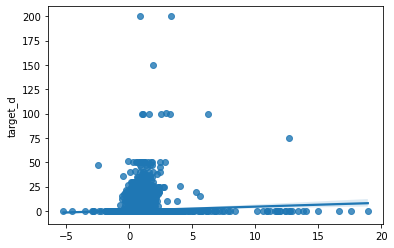

In [31]:
sns.regplot(y_pred, y_test)

As we see this graph, the higher amount donors are predicted around zero. Let's look deeper and check without the zeros from all those who didn't donate.

In [32]:
y_test[y_test > 0]

55252    21.0
4286     25.0
80820    28.0
24857    20.0
15001    10.0
         ... 
56968    10.0
33293    11.0
61363     7.0
17344     8.0
23952    10.0
Name: target_d, Length: 1431, dtype: float64

In [33]:
y_test_higher = y_test[y_test > 0].index
y_test_higher

Int64Index([55252,  4286, 80820, 24857, 15001, 38517, 29898, 49281, 60084,
            55331,
            ...
            91535, 20682, 83360, 32438, 54521, 56968, 33293, 61363, 17344,
            23952],
           dtype='int64', length=1431)

In [34]:
y_pred = lm.predict(X_test.loc[y_test_higher])
MAE = mean_absolute_error(y_test.loc[y_test_higher], y_pred)
MSE = mean_squared_error(y_test.loc[y_test_higher], y_pred, squared=False)
MAE, MSE

(14.951416735399052, 19.81330722994217)

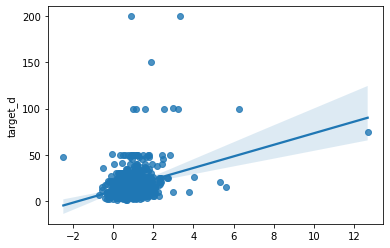

In [35]:
sns.regplot(y_pred, y_test.loc[y_test_higher])

This is a better regression line than before. But the errors are worse than before. Let's possibly dig some more

### Try Scaling (log) to see if the regression line will fit even better

In [36]:
# Define a "new" dataframe
X_clean= X.applymap(lambda x: np.nan if x == 0 else x)
X_scaled = X_clean.applymap(np.log)
X_scaled = X_scaled.fillna(0)

y_clean = y.apply(lambda x: np.nan if x == 0 else x)
y_scaled = y_clean.apply(np.log)
y_scaled = y_scaled.fillna(0)

-0.0005856285830267982


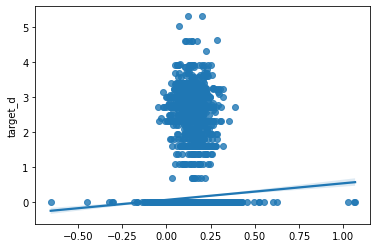

In [37]:
# Train-test split with the "new" dataframe, fit the model and get "new" predictions
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

y_preds = lm.predict(X_test)

# Get visuals
sns.regplot(y_preds, y_test)

### Try again but without zeros in the "new" scaled dataframe

In [38]:
# Another "new" dataframe
X_scaled = X.applymap(lambda x: np.nan if x == 0 else x).applymap(np.log).fillna(0)
y_scaled = y.apply(lambda x: np.nan if x == 0 else x).apply(np.log).fillna(0)

y_scaled_higher = y_scaled[y_scaled > 0]
x_scaled_higher = X_scaled.loc[y_scaled_higher.index]

0.5961384578566183


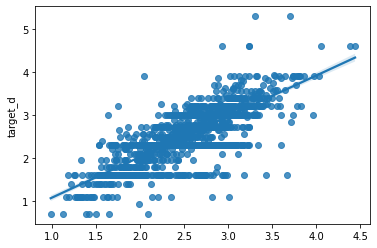

In [39]:
# Train-test split again - with the scaled dataframe without the zeros , fit the model and get the predictions
X_train, X_test, y_train, y_test = train_test_split(x_scaled_higher, y_scaled_higher, test_size=0.3, random_state=42)
# X.loc[index_to_keep], y.loc[index_to_keep]
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

y_pred = lm.predict(X_test)

# Get new visuals
sns.regplot(y_pred, y_test)

R-squared looks a lot better. Now let's check the errors

In [40]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=False)

# Since we scaled y, we need to unscale it to get metrics the right metrics
print(np.exp(MAE), np.exp(MSE)) # np.exp(np.log(2))

1.3266841170281143 1.4877744404593423


Although this looks good, we can't relax yet. Because our model so only tries to answer one part of the problem ( which is how much they will donate). But we still can't say anything yet about if a person is going to donate or not.

In [41]:
# Let's check how our model would possibly behave if we try to predict non-donors (i.e with target_d is zero)
X_scaled = X.applymap(lambda x: np.nan if x == 0 else x).applymap(np.log).fillna(0)
y_scaled = y.apply(lambda x: np.nan if x == 0 else x).apply(np.log).fillna(0)


lm.score(X_scaled, y_scaled)

-20.567755193440778

### Conclusions
We can see that it is challenging to predict the whole situation with a Regression model, but one part of our problem is possible if we remove the non-donors. We might be able to use it to predict the values to be donated, but we'll get big errors for the non-donors. Maybe we can try to predict if the person is a donor or not before trying to figure out the amount that will be donated.

We could try to use a Classification model on target_b (donated or not), so we can filter out the NO predictions and use only the YES predictions on the Regression model.

But first, let's see if we can use a Classification model that would predict NOT A DONOR, DONOR, HIGH AMOUNT DONOR, by bucketing target_d, so we could try to solve all our problems with one model:

## Try Classification Model by Bucketing donated amounts

In [42]:
# Define the different groups for y
y_group = y.apply(lambda x: 1 if x > 0 and x < 20 else 2 if x >= 20 else 0)

In [43]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y_group, test_size=0.3, random_state=42)

model.fit(X_train,y_train)

y_group_preds = model.predict(X_test)

print(classification_report(y_test, y_group_preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27153
           1       0.00      0.00      0.00       961
           2       0.00      0.00      0.00       470

    accuracy                           0.95     28584
   macro avg       0.32      0.33      0.32     28584
weighted avg       0.90      0.95      0.93     28584



In [44]:
# Check value counts
y_group.value_counts()

0    90443
1     3310
2     1527
Name: target_d, dtype: int64

We see huge data imbalance, so let's try to downsample 

In [45]:
from imblearn.under_sampling import TomekLinks

# We should train-test split first and then fit_resample only on the training set

X_train, X_test, y_train, y_test = train_test_split(X, y_group, test_size=0.3, random_state=42)

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_resample(np.array(X_train), y_train)

y_tl.value_counts()

0    61617
1     2349
2     1057
Name: target_d, dtype: int64

In [46]:
# Try to upsample with smote
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(np.array(X_train), y_train)
y_sm.value_counts()

0    63290
1    63290
2    63290
Name: target_d, dtype: int64

Let's try running the techniques we have seen already in a pipeline. The idea is:
1 - to use tomeklinks on the majority class (0) to remove borderline cases that might confuse our model;
2 -  we upsample with SMOTE Since it won't be enough;
3 - Then to ensure that SMOTE didn't generate borderline cases, we can apply tomeklinks one more time on 'all'.

In [47]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(np.array(X_train), y_train)
print('1st TkLinks:')
print(y_tl.value_counts())

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_tl, y_tl)
print('SMOTE:')
print(y_sm.value_counts())

tl = TomekLinks('all')
X_tl, y_tl = tl.fit_resample(X_sm, y_sm)
print('2nd TkLinks:')
print(y_tl.value_counts())

1st TkLinks:
0    61617
1     2349
2     1057
Name: target_d, dtype: int64
SMOTE:
0    61617
1    61617
2    61617
Name: target_d, dtype: int64
2nd TkLinks:
2    61560
1    61456
0    61421
Name: target_d, dtype: int64


As we saw, it took so long to complete the above models. And it's because of so many features. Since we don't want to lose the provided information but still want to reduce the features, we can use PCA or t-SNE. 
Here we will chose the PCA technique

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# for PCA, it is important to make everything between 0 and 1 first:
scaler = MinMaxScaler().fit(X_sm)

X_sm = scaler.transform(X_sm)

pca = PCA(n_components=.95, random_state=42)
pca.fit(X_sm, y_sm)

X_train_ = pca.transform(X_sm)
X_test_ = pca.transform(scaler.transform(X_test))

In [49]:
X_train_.shape

(184851, 132)

We have reduced the number of columns significantly. Let's try different models and see if we can hopefully get something good

In [50]:
# The Support Vector Machine - Classifier
from sklearn.svm import SVC

svc = SVC()

svc = SVC().fit(X_train_,y_sm)

preds = svc.predict(X_test_)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27153
           1       0.06      0.00      0.01       961
           2       0.05      0.00      0.01       470

    accuracy                           0.95     28584
   macro avg       0.35      0.33      0.33     28584
weighted avg       0.91      0.95      0.92     28584



In [51]:
# The XGBoost Algorithm

from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=7)

xgb.fit(X_train_,y_sm)

preds = xgb.predict(np.array(X_test_))

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     27153
           1       0.07      0.50      0.12       961
           2       0.03      0.40      0.06       470

    accuracy                           0.54     28584
   macro avg       0.35      0.48      0.29     28584
weighted avg       0.91      0.54      0.66     28584



In [52]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(n_jobs=7)

rdf.fit(X_train_,y_sm)

preds = rdf.predict(X_test_)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27153
           1       0.13      0.02      0.03       961
           2       0.14      0.00      0.00       470

    accuracy                           0.95     28584
   macro avg       0.41      0.34      0.34     28584
weighted avg       0.91      0.95      0.92     28584



In [53]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=7)

lr.fit(X_train_, y_sm)

preds = lr.predict(X_test_)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.25      0.40     27153
           1       0.07      0.66      0.12       961
           2       0.03      0.66      0.05       470

    accuracy                           0.27     28584
   macro avg       0.35      0.52      0.19     28584
weighted avg       0.92      0.27      0.38     28584



In [54]:
# Logistic Regression Algorithm with different class weights


from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(n_jobs=7, class_weight={0: .2, 1: 8, 2: 15})

lr2.fit(X_train_,y_sm)

preds = lr2.predict(X_test_)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27153
           1       0.06      0.69      0.12       961
           2       0.02      0.91      0.05       470

    accuracy                           0.04     28584
   macro avg       0.03      0.53      0.05     28584
weighted avg       0.00      0.04      0.00     28584



### Let's Predict target_b
Since we already were able to predict how much the donor will donate(earlier on in this notebook) and trying the different models above will take extra work to get a good trade-off, yet the no promising results, we can take a different approach of binary classification problem i.e to predict if the person will donate or not (target_b) 


In [57]:
# Define y as target_b
y = df_with_no_nulls['target_b']

# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Upsample the dataset using SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(np.array(X_train), y_train)

# Reduce the columns with PCA - but use the minmaxscaler first
scaler = MinMaxScaler().fit(X_sm)

X_sm = scaler.transform(X_sm)

pca = PCA(n_components=.95, random_state=42)
pca.fit(X_sm, y_sm)

X_train_ = pca.transform(X_sm)
X_test_ = pca.transform(scaler.transform(X_test))

In [58]:
# Apply the logistic Regression
lr = LogisticRegression(n_jobs=7, class_weight={1: 3})
lr.fit(X_train_,y_sm)

preds = lr.predict(X_test_)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     27153
           1       0.05      0.97      0.10      1431

    accuracy                           0.10     28584
   macro avg       0.51      0.52      0.10     28584
weighted avg       0.93      0.10      0.11     28584



In [63]:
# Show results
df = pd.DataFrame(y_test)
df['send_mail'] = preds
df['target_d'] = df_with_no_nulls.loc[df.index]['target_d']

df

,target_b,send_mail,target_d
55252,1,1,21.0
70164,0,1,0.0
48880,0,0,0.0
56750,0,1,0.0
40136,0,1,0.0
...,...,...,...
11872,0,1,0.0
54754,0,1,0.0
51063,0,1,0.0
39187,0,1,0.0


In [74]:
# Amount spent on sending all mails
total_amount_spent_on_all_mails = len(df) * 0.68


# Amount spent on sending mails out based on our model(i.e to those that the model predicts will donate)
total_amount_spent_on_sent_mails = len(df[df['send_mail'] > 0]) * 0.68


# Total amount of donations that our model missed
total_missed_donations = sum(df[(df['send_mail'] == 0) & (df['target_d'] > 0)]['target_d'])


# Amount spent on sending mails to those that didn't donate(i.e our model predicted they will donate but they didn't)
total_extra_spent_on_mail = round(len(df[(df['send_mail'] == 1) & (df['target_b'] == 0)]) * 0.68, 2) 


# Total amount that was saved by using our model
savings = round(total_amount_spent_on_all_mails - total_missed_donations - total_amount_spent_on_sent_mails, 2)

if savings <= 0:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print('''This model saved ${} in mails.
        Missed ${} in donations and wasted ${} in mails not responded.
        You made: ${}
           '''.format(savings, total_missed_donations, total_extra_spent_on_mail, sum(df['target_d']) - total_amount_spent_on_sent_mails ))

This model saved $87.32 in mails.
        Missed $1034.0 in donations and wasted $17370.6 in mails not responded.
        You made: $4277.199999999997
           


### Let's try a different and a simpler approach - Use more columns and Fill NaNs with zeros

In [20]:
# Load data afresh and fill NaNs with zeros
data_ = pd.read_csv('learningSet.csv').fillna(0).set_index('CONTROLN')
data_.head()#.shape

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95515,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,0.0,0.0,F,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,6

In [21]:
# Remove only columns that have more than 200 categories
remove_cols = [col for col in data_ if data_[col].dtype == 'object' and len(data_[col].unique()) >= 200]

data_ = data_.drop(columns=remove_cols)
data_ = pd.get_dummies(data_)
data_.shape

(95412, 2797)

In [22]:
# X - Y split 
X = data_.drop(columns=['TARGET_B', 'TARGET_D'])
y = data_['TARGET_B']

# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Reduce the columns with PCA - but use the minmaxscaler first
scaler = MinMaxScaler().fit(X_train)

X_sm = scaler.transform(X_train)

pca = PCA(n_components=.95, random_state=42)
pca.fit(X_sm, y_train)

X_train_ = pca.transform(X_sm)
X_test_ = pca.transform(scaler.transform(X_test))
X_train_.shape

(66788, 578)

In [26]:

# Upsample the dataset using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(np.array(X_train_), y_train)

# Define a model and fit the upsampled data
model = LogisticRegression(n_jobs=7, class_weight={1: 3})
model.fit(X_sm,y_sm)

# Get new predictions
preds = model.predict(np.array(X_test_))

In [27]:
# Get the metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.19      0.31     27200
           1       0.05      0.88      0.10      1424

    accuracy                           0.22     28624
   macro avg       0.51      0.54      0.21     28624
weighted avg       0.92      0.22      0.30     28624



In [32]:
# Show results (i.e preds as "send_mail")
df = pd.DataFrame(y_test)
df['send_mail'] = preds
df['TARGET_D'] = data_.loc[df.index]['TARGET_D']
df

,TARGET_B,send_mail,TARGET_D
CONTROLN,,,
133586,0,1,0.0
150220,0,1,0.0
67579,0,1,0.0
147358,0,1,0.0
135732,0,0,0.0
...,...,...,...
57844,0,1,0.0
24707,0,0,0.0
66918,0,0,0.0


In [34]:
# Amount spent on sending all mails
total_amount_spent_on_all_mails = len(df) * 0.68


# Amount spent on sending mails out based on our model(i.e to those that the model predicts will donate)
total_amount_spent_on_sent_mails = len(df[df['send_mail'] > 0]) * 0.68


# Total amount of donations that our model missed
total_missed_donations = sum(df[(df['send_mail'] == 0) & (df['TARGET_D'] > 0)]['TARGET_D'])


# Amount spent on sending mails to those that didn't donate(i.e our model predicted they will donate but they didn't)
total_extra_spent_on_mail = round(len(df[(df['send_mail'] == 1) & (df['TARGET_B'] == 0)]) * 0.68, 2) 


# Total amount that was saved by using our model
savings = round(total_amount_spent_on_all_mails - total_missed_donations - total_amount_spent_on_sent_mails, 2)

if savings <= 0:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print('''This model saved ${} in mails.
        Missed ${} in donations and wasted ${} in mails not responded.
        You made: ${}
           '''.format(savings, total_missed_donations, total_extra_spent_on_mail, sum(df['TARGET_D']) - total_amount_spent_on_sent_mails ))

This model saved $363.96 in mails.
        Missed $3204.0 in donations and wasted $15040.24 in mails not responded.
        You made: $6527.889999999999
           


Some Insights: 
Interestingly the different and last approach gave us a better result - although our model missed more of the donations but we saved and recovered more and wasted less money.

Showing that the Classification approach with more columns(data) worked better by giving better results.